<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/Regression_pt_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(x,y)

In [ ]:
import tensorflow as tf
x = tf.cast(tf.constant(x,),dtype=tf.float32)
y = tf.cast(tf.constant(y,),dtype=tf.float32)
x,y


In [ ]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

In [ ]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [ ]:
model.fit(x,y, epochs=50)

In [ ]:
model.predict([17.0])

In [ ]:
# rebuilt our model
# creating the model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))


# compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fitting the model
model.fit(x,y,epochs=100)


In [ ]:
model.predict([17.0])

In [ ]:
# create the model with another layer

#create the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1,])), # input layer
model.add(tf.keras.layers.Dense(100, activation=None))
model.add(tf.keras.layers.Dense(1)) # output layers


#compiling the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

#fitting the model

model.fit(x,y,epochs=100)

In [ ]:
model.predict([17.0])

In [ ]:
import tensorflow as tf
x = tf.range(-100, 100, 4)
y = x + 10
x, y

In [ ]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

x_train, y_train, x_test, y_test

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

# Visualiizng the Data

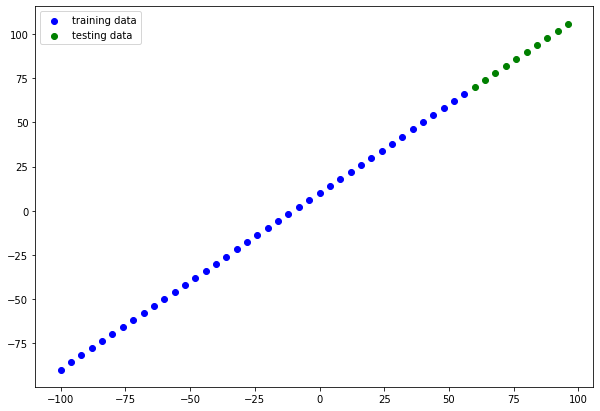

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b", label="training data")
plt.scatter(x_test,y_test,c="g", label="testing data")
plt.legend();

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,epochs = 100, verbose=1)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)
plot_model(model=model, show_shapes=True)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
    ], name="our_model")

model.compile(loss = tf.keras.losses.mae),
optimizer= tf.keras.optimizers.SGD(),
metrics=["accuracy",tf.keras.metrics.Precision()]

#model.summary()
model.fit(x_train,y_train, epochs = 1000)

In [ ]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 319ms/step


array([[ 70.01857],
       [ 74.01954],
       [ 78.0205 ],
       [ 82.02146],
       [ 86.02242],
       [ 90.02338],
       [ 94.02434],
       [ 98.02531],
       [102.02627],
       [106.02722]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
model.predict([990])

1/1 [==============================] - 0s 61ms/step


array([[1000.24194]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
def plot_prediction ( train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="g", label="testing data")
    plt.scatter(test_data, predictions,c="r",label="predictions")

    plt.legend();

plot_prediction()


# Evaluating model predictions with **Regression evaluation metrics**

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.0229


0.022901153191924095

In [ ]:
tf.keras.losses.mean_absolute_error(y_true=y_test,
                                    y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.985144, 14.788277, 12.3918  , 10.795708, 10.      , 10.004675,
       10.809735, 12.415184, 14.821014, 18.027222], dtype=float32)>

In [ ]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.01857],
       [ 74.01954],
       [ 78.0205 ],
       [ 82.02146],
       [ 86.02242],
       [ 90.02338],
       [ 94.02434],
       [ 98.02531],
       [102.02627],
       [106.02722]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.keras.losses.MAE(y_true = y_test,
                   y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.022900391>

## MSE

In [ ]:
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.00053204887>

# making functions

In [ ]:
y_true = y_test

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze( y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                       y_pred = tf.squeeze(y_pred))


mae(y_true, y_pred)
mse(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00053204887>

# Experimenting on our Model

In [ ]:
x_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model.fit(x_train,y_train, epochs=100)

In [ ]:
x_test

1/1 [==============================] - 0s 18ms/step


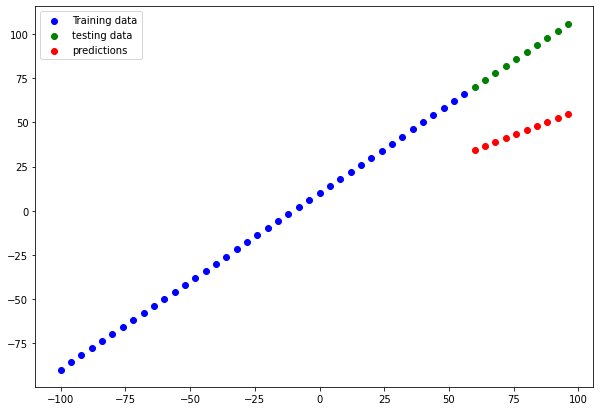

In [ ]:
y_preds_1 = model_1.predict(x_test)
y_preds_1

plot_prediction(predictions=y_preds_1)

In [ ]:
mae_1 = mae(y_test,tf.squeeze(y_preds_1))
mse_1 = mse(y_test,tf.squeeze(y_preds_1))
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=43.535328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1919.7249>)

# Build model_2
2 dense layers, trained for 100 epochs


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mse"])

model_2.fit(x_train, y_train, epochs=100)



1/1 [==============================] - 0s 47ms/step


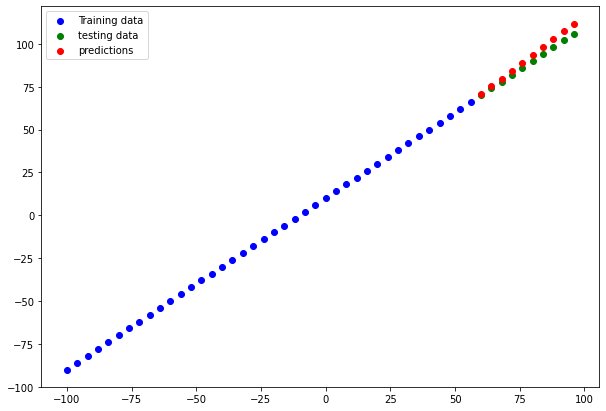

In [ ]:
y_preds_2 = model_2.predict(x_test)
plot_prediction(predictions=y_preds_2)

# calculate model_2 evaluation metrics

In [ ]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

# model_3

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(x_train, y_train, epochs=500)


1/1 [==============================] - 0s 49ms/step


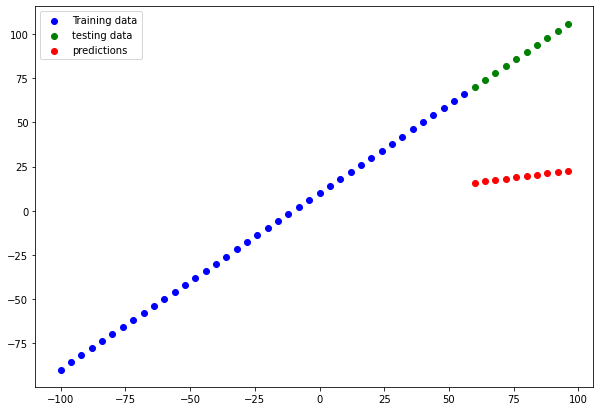

In [ ]:
y_preds_3 = model_3.predict(x_test)
plot_prediction(predictions = y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_2)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [ ]:
model_2.save('my_1st')

In [ ]:
model_2.save("my_2nd.h5")

In [ ]:
loading_saved_model = tf.keras.models.load_model("my_1st")
loading_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(x_test)
loading_saved_model_preds = loading_saved_model.predict(x_test)
model_2_preds == loading_saved_model_preds

1/1 [==============================] - 0s 17ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_model = tf.keras.models.load_model("/content/my_2nd.h5")
loaded_h5_model

# downloading files

In [ ]:
from google.colab import files
files.download("/content/my_1st")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("my_2nd.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/my_1st /content/drive/

cp: -r not specified; omitting directory '/content/my_1st'


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'
